In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#load the data from sklearn.datasets
data     = load_iris()


#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label

#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split( 
                                        #TODO: enter the appropriate values to partition the data, 
                                        #and ensure your results are reproducible
                                        #and obtain stratified samples
                                                    X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 25% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    stratify=y      #preserve the distribution of the labels
                                        ) 


In [8]:
df = DecisionTreeClassifier(criterion='entropy', random_state=7)
df.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

In [9]:
#predict the labels for the test set
y_pred   = df.predict(X_test)

print('The predicted BMI is: {}'.format(y_pred))

The predicted BMI is: [1 1 2 0 1 0 2 2 2 0 0 2 0 1 1 1 2 1 2 2 0 1 2 1 1 0 0 2 0 2 1 1 1 0 0 1 1
 0 1 0 2 2 2 0 0]


In [11]:
# Prediction accuracy
print('The accuracy of the model is: {}'.format(df.score(X_test, y_test)))

The accuracy of the model is: 0.9333333333333333


In [13]:
#get the classification report for the decision tree
y_pred = df.predict(X_test)

target_names = ['Iris Setosa', 'Iris Virginica', 'Iris Versicolor']
print(classification_report(y_test, y_pred, target_names = target_names))

                 precision    recall  f1-score   support

    Iris Setosa       1.00      1.00      1.00        15
 Iris Virginica       0.88      0.93      0.90        15
Iris Versicolor       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



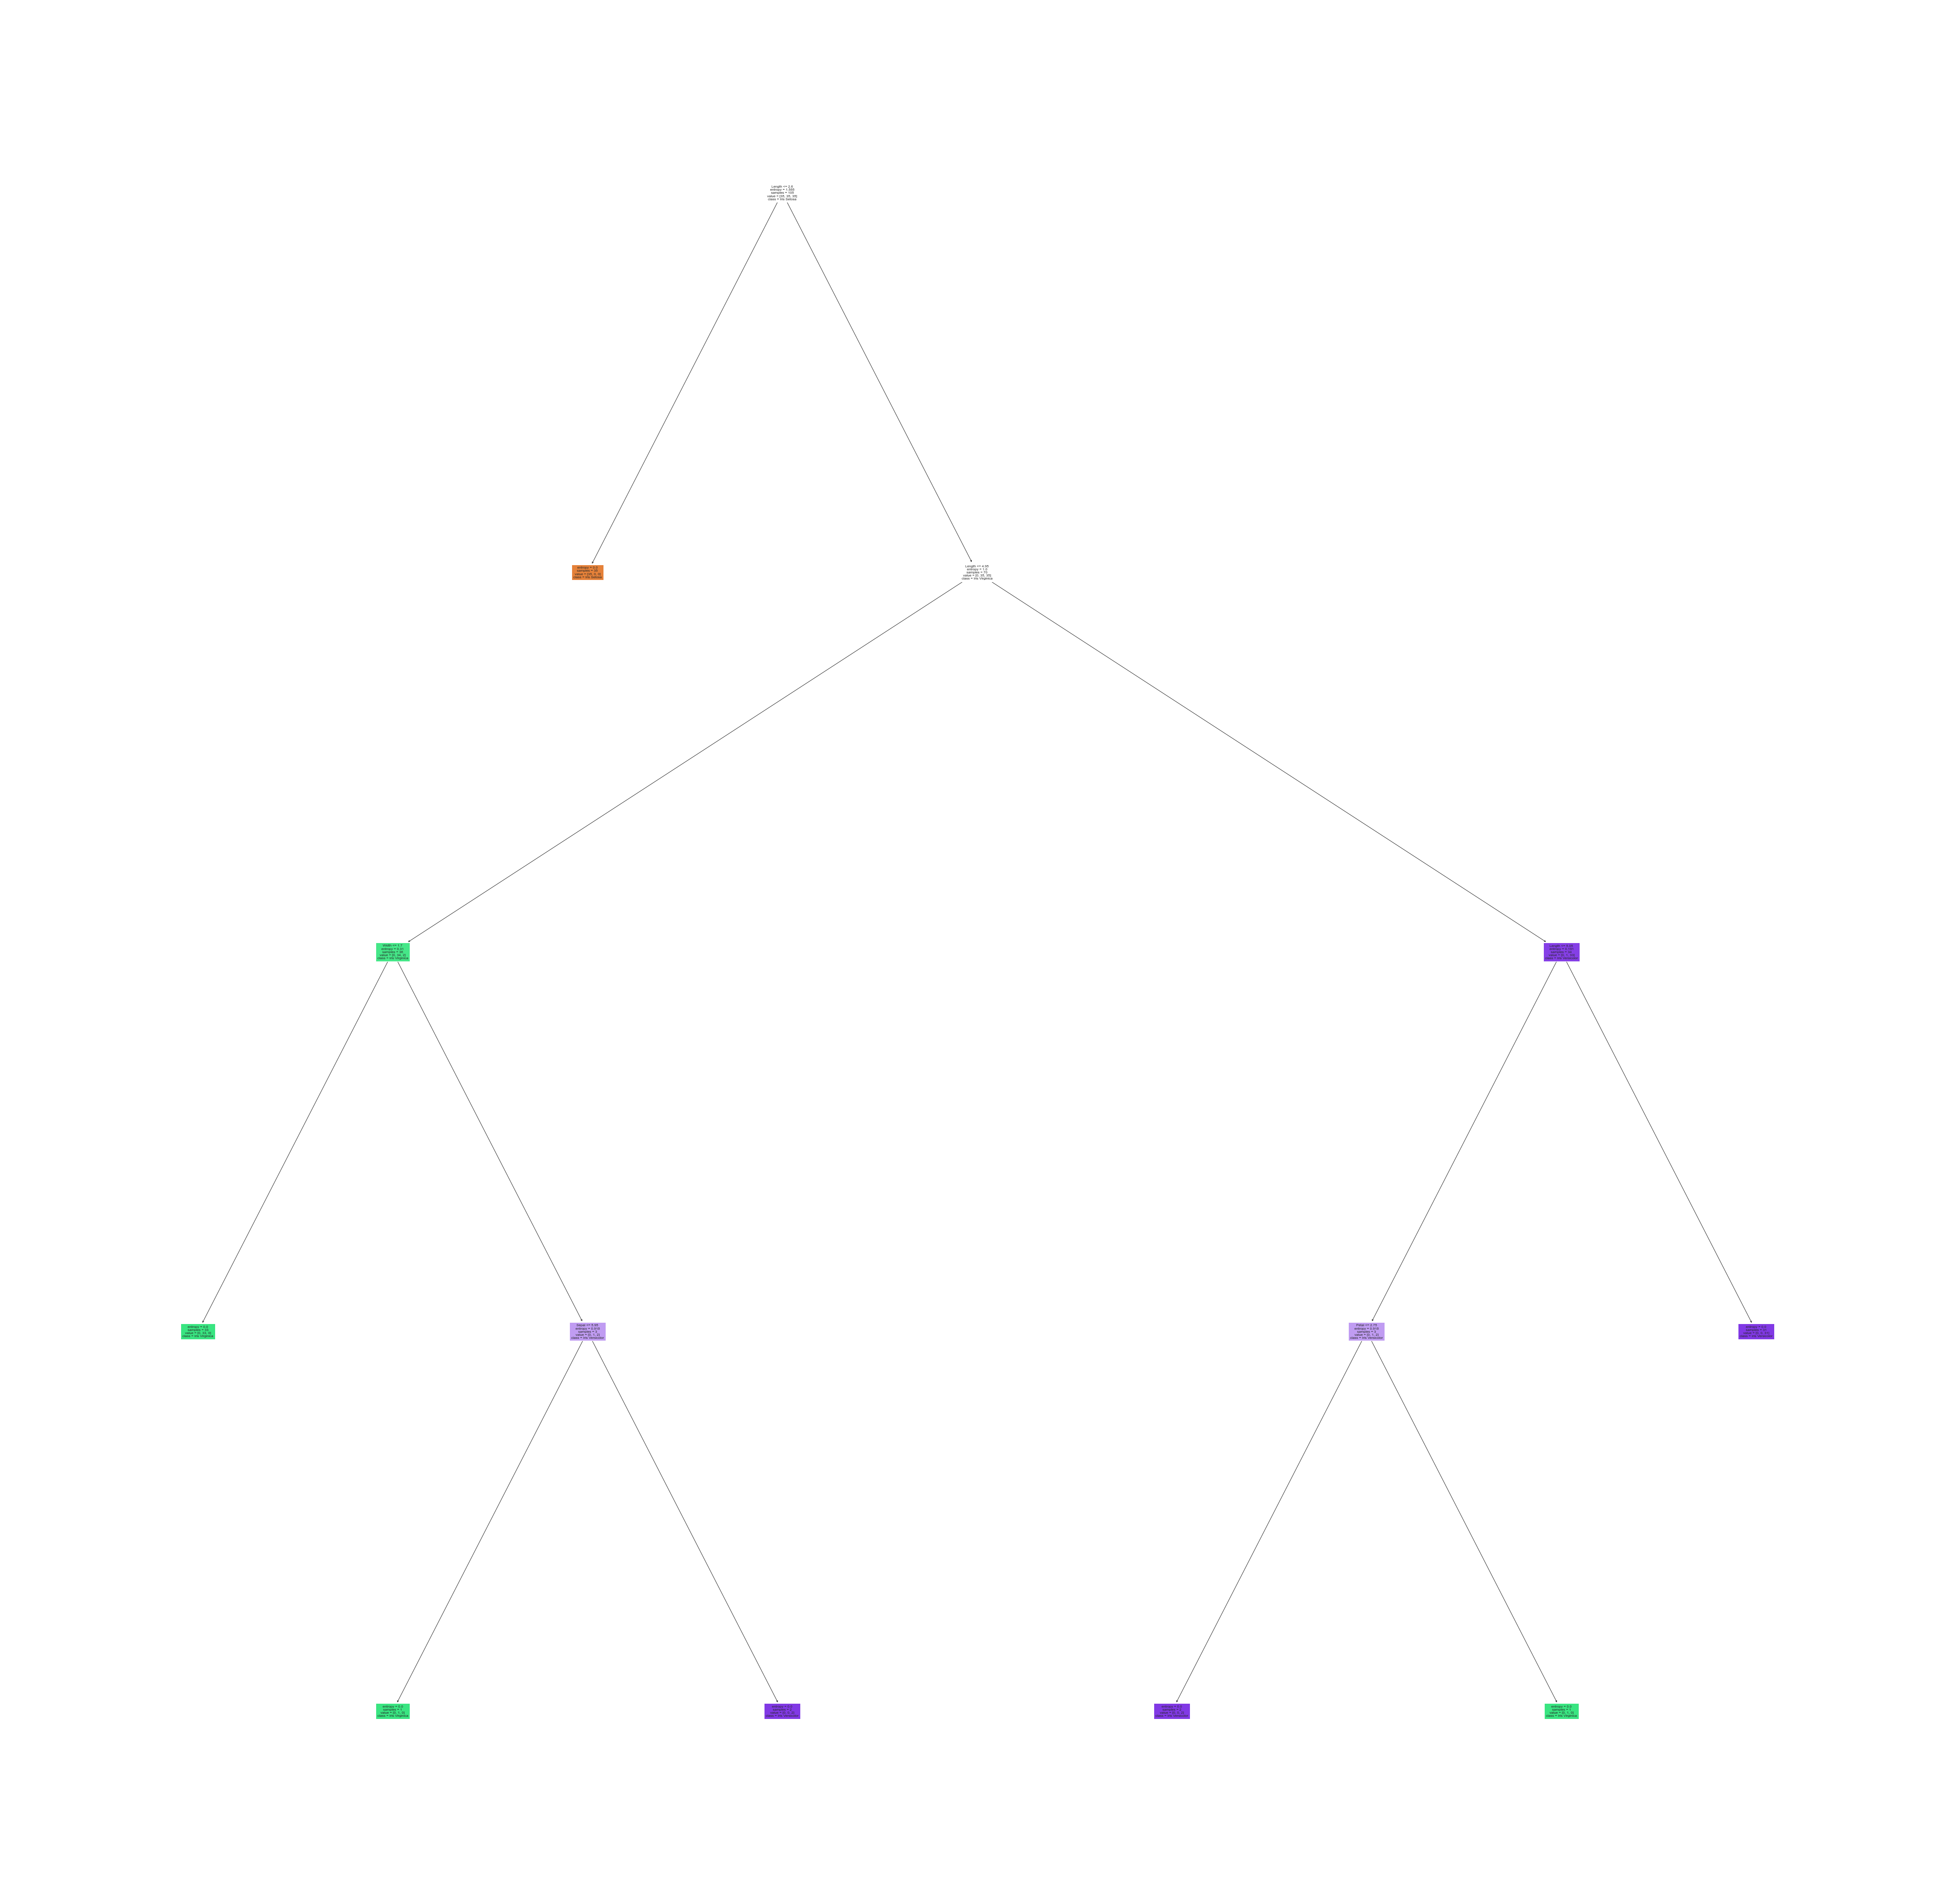

In [15]:
# The predictions of the decision tree are accurate because iris setosa has a precision of 1 and iris virginia and 
# iris versicolor have precisions above a 0.85. 

from sklearn import tree

fig = plt.figure(figsize=(80, 80))
tree.plot_tree(df, 
                   feature_names=['Sepal', 'Petal', 'Length', 'Width'],  
                   class_names=target_names,
                   filled=True, fontsize=8)

plt.show()
